In [5]:
#CT image reconstruct through the FBP algorithm
#Written by Ren-Qi Pan
import math
import os
from pydicom import dcmread
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [6]:
_pth = r"E:\CMC\pyprojects\radio_therapy\dose-3d\dataset\VMAT 2025- TPS DOSE FILES\60Gy in 30#\3D DOSE\6. SIB COMPLEX\RD.1.2.246.352.71.7.941004452793.3192006.20250604110043.dcm"
# _pth = r"E:\CMC\pyprojects\radio_therapy\dose-3d\dataset\VMAT 2025 - 6. SIB COMPLEX TARGET\T1\873251691\00790.dcm"
# _pth = r"E:\CMC\pyprojects\radio_therapy\dose-3d\dataset\10x10_TRIAL 1\873251696\00004.dcm"
# _pth = r"E:\CMC\pyprojects\radio_therapy\dose-3d\dataset\VMAT 2025 - 1. CENTRAL TARGET\TRIAL 1\873251666\00000.dcm"

In [7]:
dcm = dcmread(_pth)

In [8]:
images = dcm.pixel_array

In [9]:
images.shape

(136, 111, 120)

In [10]:
dcm

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 192
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: RT Dose Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.246.352.71.7.941004452793.3192006.20250604110043
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.163.2
(0002,0013) Implementation Version Name         SH: 'File Svc 16.1'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 192'
(0008,0012) Instance Creation Date              DA: '20250712'
(0008,0013) Instance Creation Time              TM: '102220'
(0008,0016) SOP Class UID                       UI: RT Dose Storage
(0008,0018) SOP Instance UID                    UI: 1.2.246.352.71.7.941004452793.3192006.20250604110043
(0008,0020) Study Date

In [60]:
np.max(images[60])

np.uint16(6)

In [61]:
# plt.imshow(images)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

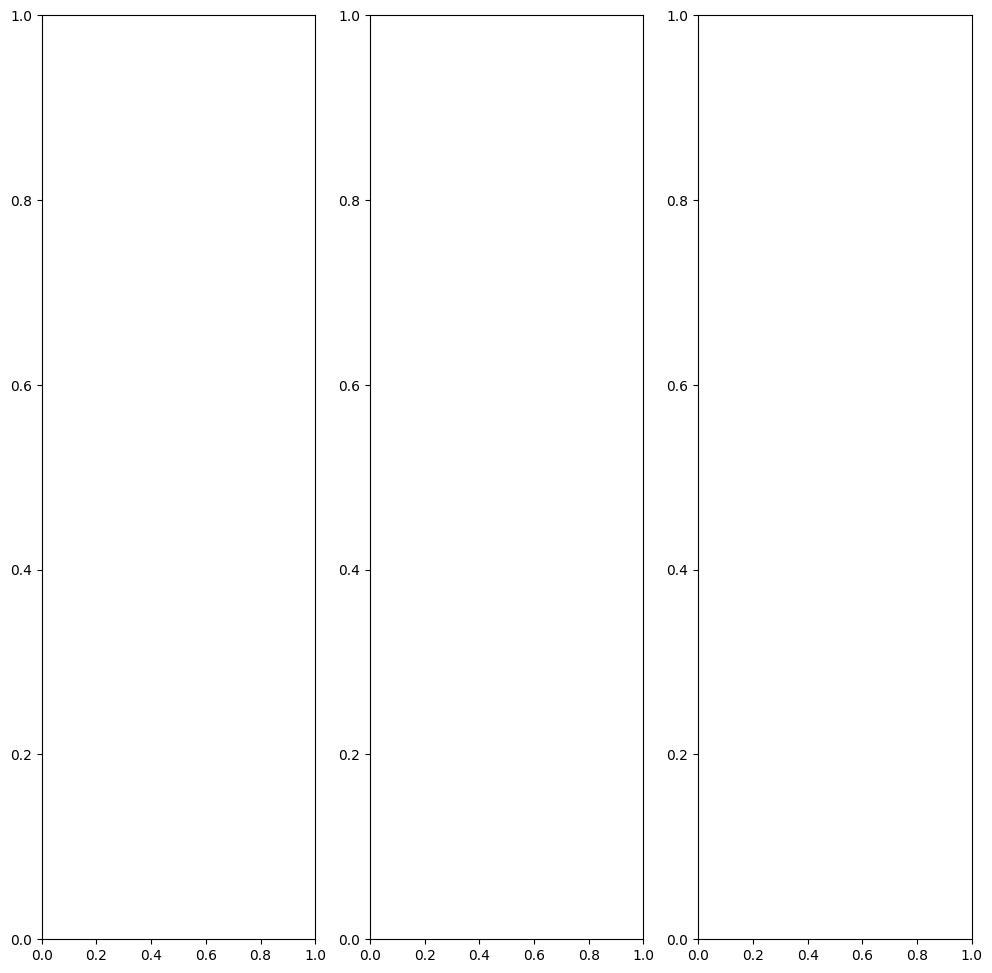

In [62]:
Nimage = images.shape[0]
NimageZ=Nimage*images.shape[0]/images.shape[0]
Z_c=int(NimageZ/2.0)
X_c=int(Nimage/2.0)
Y_c=int(Nimage/2.0)
figure, axis=plt.subplots(1, 3,figsize=(12,12))
axis[0].imshow(images[X_c,:,:].T, cmap='CMRmap_r')
axis[0].set_title('cross section at X=0')
axis[0].axis('off')
axis[1].imshow(images[:,Y_c,:].T, cmap='CMRmap_r')
axis[1].set_title('cross section at Y=0')
axis[1].axis('off')
axis[2].imshow(images[:,:,Z_c].T, cmap='CMRmap_r')
axis[2].set_title('cross section at Z=0')
# axis[2].axis('off')
# plt.savefig(directory+"rec_image.pdf",format='pdf',dpi=250)
# plt.title('TPS dose')
figure.align_titles()
plt.show()